This machine learning project aims to detect credit card fradulency

This project has been done by Koustov Khamaru as a part of the Machine Learning Internship program of CodSoft.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Importing the test dataset

In [ ]:
df1 = pd.read_csv("fraudTest.csv")

Importing the train dataset

In [ ]:
df2 = pd.read_csv("fraudTrain.csv")

Working with the data to find out trends

In [ ]:
df1.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  42783.00000  4.278300e+04  42783.000000  42783.000000  42783.000000   
mean   21391.00000  4.178604e+17     69.280523  48657.973705     38.546661   
std    12350.53262  1.309759e+18    147.145700  26785.611559      5.061375   
min        0.00000  6.041621e+10      1.000000   1257.000000     20.027100   
25%    10695.50000  1.800429e+14      9.735000  26041.000000     34.668900   
50%    21391.00000  3.519233e+15     47.000000  48088.000000     39.371600   
75%    32086.50000  4.634956e+15     82.820000  72011.000000     42.014400   
max    42782.00000  4.992346e+18  13149.150000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  42783.000000  4.278300e+04  4.278200e+04  42782.000000  42782.000000   
mean     -90.119737  9.009444e+04  1.372431e+09     38.546108    -90.119882   
std       13.617445  3.041471e+05  3.790095e+05      5.097629     13.629012   
min     -165.672300  2.300000e+01  1.371817e+09     19.057104   -166.646251   
25%      -96.727000  7.430000e+02  1.372074e+09     34.755632    -96.800144   
50%      -87.458100  2.435000e+03  1.372451e+09     39.383388    -87.395269   
75%      -80.158000  2.032800e+04  1.372732e+09     41.974486    -80.228762   
max      -67.950300  2.906700e+06  1.373088e+09     66.669356    -66.955602   

           is_fraud  
count  42782.000000  
mean       0.004301  
std        0.065441  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [ ]:
df2.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  42831.000000  4.283100e+04  42831.000000  42831.000000  42831.000000   
mean   21415.000000  4.178002e+17     71.563338  48733.948939     38.536225   
std    12364.389027  1.310122e+18    151.062206  27017.786941      5.091000   
min        0.000000  6.041621e+10      1.000000   1257.000000     20.027100   
25%    10707.500000  1.800429e+14      9.690000  25832.000000     34.668900   
50%    21415.000000  3.519607e+15     47.970000  48088.000000     39.346500   
75%    32122.500000  4.642255e+15     83.680000  72042.000000     41.846700   
max    42830.000000  4.992346e+18  11872.210000  99783.000000     65.689900   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  42831.000000  4.283000e+04  4.283000e+04  42830.000000  42830.000000   
mean     -90.241386  8.852743e+04  1.326469e+09     38.536078    -90.247263   
std       13.953112  2.977794e+05  6.255365e+05      5.121287     13.962830   
min     -165.672300  2.300000e+01  1.325376e+09     19.040141   -166.629875   
25%      -96.809400  7.430000e+02  1.325940e+09     34.785872    -96.940941   
50%      -87.456900  2.456000e+03  1.326489e+09     39.348741    -87.366152   
75%      -80.128400  2.047800e+04  1.327043e+09     41.924197    -80.174018   
max      -12.000000  2.906700e+06  1.327591e+09     66.659242    -66.967742   

           is_fraud  
count  42830.000000  
mean       0.009269  
std        0.095831  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42783 entries, 0 to 42782
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42783 non-null  int64  
 1   trans_date_trans_time  42783 non-null  object 
 2   cc_num                 42783 non-null  int64  
 3   merchant               42783 non-null  object 
 4   category               42783 non-null  object 
 5   amt                    42783 non-null  float64
 6   first                  42783 non-null  object 
 7   last                   42783 non-null  object 
 8   gender                 42783 non-null  object 
 9   street                 42783 non-null  object 
 10  city                   42783 non-null  object 
 11  state                  42783 non-null  object 
 12  zip                    42783 non-null  int64  
 13  lat                    42783 non-null  float64
 14  long                   42783 non-null  float64
 15  ci

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42831 entries, 0 to 42830
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42831 non-null  int64  
 1   trans_date_trans_time  42831 non-null  object 
 2   cc_num                 42831 non-null  int64  
 3   merchant               42831 non-null  object 
 4   category               42831 non-null  object 
 5   amt                    42831 non-null  float64
 6   first                  42831 non-null  object 
 7   last                   42831 non-null  object 
 8   gender                 42831 non-null  object 
 9   street                 42831 non-null  object 
 10  city                   42831 non-null  object 
 11  state                  42831 non-null  object 
 12  zip                    42831 non-null  int64  
 13  lat                    42831 non-null  float64
 14  long                   42831 non-null  float64
 15  ci

In [ ]:
df1.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df2.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
df1.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num     unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   

   is_fraud  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 23 columns]

In [ ]:
df2.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0    3495.0          Psychologist, counselling  1988-03-09   
1     149.0  Special educational needs teacher  1978-06-21   
2    4154.0        Nature conservation officer  1962-01-19   
3    1939.0                    Patent attorney  1967-01-12   
4      99.0     Dance movement psychotherapist  1986-03-28   

                          trans_num     unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1.325376e+09  38.674999  -78.632459   

   is_fraud  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 23 columns]

In [ ]:
df1.tail()

Unnamed: 0 trans_date_trans_time            cc_num  \
42778       42778   2020-07-06 05:26:44   375904527651269   
42779       42779   2020-07-06 05:26:56   373905417449658   
42780       42780   2020-07-06 05:26:57  4124536010991657   
42781       42781   2020-07-06 05:27:02  4629451965224809   
42782       42782   2020-07-06 05:27:10   375248307838179   

                             merchant       category     amt   first     last  \
42778          fraud_Erdman-Kertzmann  gas_transport   55.90    Ryan     Cook   
42779          fraud_Lebsack and Sons       misc_net  314.34   Sarah   Bishop   
42780  fraud_Ferry, Lynch and Kautzer       misc_net    5.16  Sydney  Montoya   
42781          fraud_Bahringer-Larson    grocery_net   32.55   Karen   Warren   
42782           fraud_Kerluke-Abshire   shopping_net    4.68  Joshua  Mendoza   

      gender                          street  ...      lat     long  city_pop  \
42778      M             75952 Wilson Course  ...  40.4591 -98.5551       463   
42779      F    554 Mcdonald Valley Apt. 539  ...  31.9290 -97.6443      2526   
42780      F  265 Christian Summit Suite 231  ...  30.5012 -87.8835     27829   
42781      F   4900 Curtis Gardens Suite 952  ...  30.9416 -83.3574     10295   
42782      M    4215 Miranda Field Suite 326  ...  38.8564 -80.1580       571   

                                      job         dob  \
42778                Nurse, mental health  1948-05-31   
42779                      Phytotherapist  1970-11-12   
42780             Presenter, broadcasting  1954-07-21   
42781  Teacher, special educational needs  1997-12-26   
42782               Accounting technician  1967-09-16   

                              trans_num     unix_time  merch_lat merch_long  \
42778  a6e363a0d0e4f6326a39bbfc7e176050  1.373088e+09  40.188950 -98.640236   
42779  febf3e747eaeded7a7eb0e11cba340da  1.373088e+09  31.643375 -98.448895   
42780  174e6a91429e211df86fcb07b74a6513  1.373088e+09  30.687118 -87.992191   
42781  ac9b9132a25b311f03d2e849305162eb  1.373088e+09  31.914029 -83.879478   
42782                               NaN           NaN        NaN        NaN   

       is_fraud  
42778       0.0  
42779       0.0  
42780       0.0  
42781       0.0  
42782       NaN  

[5 rows x 23 columns]

In [ ]:
df2.tail()

Unnamed: 0 trans_date_trans_time            cc_num  \
42826       42826   2019-01-26 15:08:27  3524574586339330   
42827       42827   2019-01-26 15:09:26  4364010865167176   
42828       42828   2019-01-26 15:10:11  3576431665303017   
42829       42829   2019-01-26 15:12:12    30238755902988   
42830       42830   2019-01-26 15:12:38   180094608895855   

                                  merchant        category     amt     first  \
42826                 fraud_McKenzie-Huels     food_dining   28.37    Ashley   
42827                     fraud_Barton LLC       kids_pets   84.71      Gary   
42828                  fraud_Erdman-Durgan  health_fitness  134.53   Jessica   
42829  fraud_Bahringer, Schoen and Corkery    shopping_pos    2.42  Danielle   
42830                   fraud_Schaefer Ltd       kids_pets   18.35    Tammie   

           last gender                          street  ...      lat  \
42826   Cabrera      F    94225 Smith Springs Apt. 617  ...  27.6330   
42827  Martinez      M             03512 Jackson Ports  ...  39.5483   
42828      Ward      F  72269 Elizabeth Field Apt. 132  ...  33.5623   
42829        Yu      F      5395 Colon Burgs Suite 037  ...  30.5920   
42830    Harper      F          57887 Gutierrez Harbor  ...  43.7575   

           long   city_pop                job         dob  \
42826  -80.4031   105638.0  Librarian, public  1986-05-07   
42827 -119.7957   276896.0       Immunologist  1997-03-12   
42828 -112.0559  1312922.0         Contractor  1981-10-24   
42829  -97.2893     1766.0          Press sub  1976-01-02   
42830  -12.0000        NaN                NaN         NaN   

                              trans_num     unix_time  merch_lat  merch_long  \
42826  b84678e05a1fe0423c27edd44c47a912  1.327591e+09  27.958330  -79.973208   
42827  0576985c3ab2858e0371085ab4dbb8f7  1.327591e+09  39.801946 -119.286741   
42828  6e6fd83b78d11122c559036e9208b7e1  1.327591e+09  33.042530 -111.186488   
42829  ab09218dab34d39e7ef174655b21a28c  1.327591e+09  31.461002  -96.868171   
42830                               NaN           NaN        NaN         NaN   

       is_fraud  
42826       0.0  
42827       0.0  
42828       0.0  
42829       0.0  
42830       NaN  

[5 rows x 23 columns]

Merging the train and test datasets

In [ ]:
df = pd.concat([df1,df2])

In [ ]:
df

Unnamed: 0 trans_date_trans_time            cc_num  \
0               0   2020-06-21 12:14:25  2291163933867244   
1               1   2020-06-21 12:14:33  3573030041201292   
2               2   2020-06-21 12:14:53  3598215285024754   
3               3   2020-06-21 12:15:15  3591919803438423   
4               4   2020-06-21 12:15:17  3526826139003047   
...           ...                   ...               ...   
42826       42826   2019-01-26 15:08:27  3524574586339330   
42827       42827   2019-01-26 15:09:26  4364010865167176   
42828       42828   2019-01-26 15:10:11  3576431665303017   
42829       42829   2019-01-26 15:12:12    30238755902988   
42830       42830   2019-01-26 15:12:38   180094608895855   

                                   merchant        category     amt     first  \
0                     fraud_Kirlin and Sons   personal_care    2.86      Jeff   
1                      fraud_Sporer-Keebler   personal_care   29.84    Joanne   
2      fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28    Ashley   
3                         fraud_Haley Group        misc_pos   60.05     Brian   
4                     fraud_Johnston-Casper          travel    3.19    Nathan   
...                                     ...             ...     ...       ...   
42826                  fraud_McKenzie-Huels     food_dining   28.37    Ashley   
42827                      fraud_Barton LLC       kids_pets   84.71      Gary   
42828                   fraud_Erdman-Durgan  health_fitness  134.53   Jessica   
42829   fraud_Bahringer, Schoen and Corkery    shopping_pos    2.42  Danielle   
42830                    fraud_Schaefer Ltd       kids_pets   18.35    Tammie   

           last gender                          street  ...      lat  \
0       Elliott      M               351 Darlene Green  ...  33.9659   
1      Williams      F                3638 Marsh Union  ...  40.3207   
2         Lopez      F            9333 Valentine Point  ...  40.6729   
3      Williams      M     32941 Krystal Mill Apt. 552  ...  28.5697   
4        Massey      M        5783 Evan Roads Apt. 465  ...  44.2529   
...         ...    ...                             ...  ...      ...   
42826   Cabrera      F    94225 Smith Springs Apt. 617  ...  27.6330   
42827  Martinez      M             03512 Jackson Ports  ...  39.5483   
42828      Ward      F  72269 Elizabeth Field Apt. 132  ...  33.5623   
42829        Yu      F      5395 Colon Burgs Suite 037  ...  30.5920   
42830    Harper      F          57887 Gutierrez Harbor  ...  43.7575   

           long   city_pop                     job         dob  \
0      -80.9355   333497.0     Mechanical engineer  1968-03-19   
1     -110.4360      302.0  Sales professional, IT  1990-01-17   
2      -73.5365    34496.0       Librarian, public  1970-10-21   
3      -80.8191    54767.0            Set designer  1987-07-25   
4      -85.0170     1126.0      Furniture designer  1955-07-06   
...         ...        ...                     ...         ...   
42826  -80.4031   105638.0       Librarian, public  1986-05-07   
42827 -119.7957   276896.0            Immunologist  1997-03-12   
42828 -112.0559  1312922.0              Contractor  1981-10-24   
42829  -97.2893     1766.0               Press sub  1976-01-02   
42830  -12.0000        NaN                     NaN         NaN   

                              trans_num     unix_time  merch_lat  merch_long  \
0      2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1      324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2      c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3      2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4      57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
...                                 ...           ...        ...         ...   
42826  b84678e05a1fe0423c27edd44c47a912  1.327591e+09  27.958330  -79.973208   
428

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85614 entries, 0 to 42830
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             85614 non-null  int64  
 1   trans_date_trans_time  85614 non-null  object 
 2   cc_num                 85614 non-null  int64  
 3   merchant               85614 non-null  object 
 4   category               85614 non-null  object 
 5   amt                    85614 non-null  float64
 6   first                  85614 non-null  object 
 7   last                   85614 non-null  object 
 8   gender                 85614 non-null  object 
 9   street                 85614 non-null  object 
 10  city                   85614 non-null  object 
 11  state                  85614 non-null  object 
 12  zip                    85614 non-null  int64  
 13  lat                    85614 non-null  float64
 14  long                   85614 non-null  float64
 15  ci

Finding the null values in the dataset

In [ ]:
df.isnull()

Unnamed: 0  trans_date_trans_time  cc_num  merchant  category    amt  \
0           False                  False   False     False     False  False   
1           False                  False   False     False     False  False   
2           False                  False   False     False     False  False   
3           False                  False   False     False     False  False   
4           False                  False   False     False     False  False   
...           ...                    ...     ...       ...       ...    ...   
42826       False                  False   False     False     False  False   
42827       False                  False   False     False     False  False   
42828       False                  False   False     False     False  False   
42829       False                  False   False     False     False  False   
42830       False                  False   False     False     False  False   

       first   last  gender  street  ...    lat   long  city_pop    job  \
0      False  False   False   False  ...  False  False     False  False   
1      False  False   False   False  ...  False  False     False  False   
2      False  False   False   False  ...  False  False     False  False   
3      False  False   False   False  ...  False  False     False  False   
4      False  False   False   False  ...  False  False     False  False   
...      ...    ...     ...     ...  ...    ...    ...       ...    ...   
42826  False  False   False   False  ...  False  False     False  False   
42827  False  False   False   False  ...  False  False     False  False   
42828  False  False   False   False  ...  False  False     False  False   
42829  False  False   False   False  ...  False  False     False  False   
42830  False  False   False   False  ...  False  False      True   True   

         dob  trans_num  unix_time  merch_lat  merch_long  is_fraud  
0      False      False      False      False       False     False  
1      False      False      False      False       False     False  
2      False      False      False      False       False     False  
3      False      False      False      False       False     False  
4      False      False      False      False       False     False  
...      ...        ...        ...        ...         ...       ...  
42826  False      False      False      False       False     False  
42827  False      False      False      False       False     False  
42828  False      False      False      False       False     False  
42829  False      False      False      False       False     False  
42830   True       True       True       True        True      True  

[85614 rows x 23 columns]

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 1
job                      1
dob                      1
trans_num                2
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
dtype: int64

In [ ]:
df.interpolate
df

Unnamed: 0 trans_date_trans_time            cc_num  \
0               0   2020-06-21 12:14:25  2291163933867244   
1               1   2020-06-21 12:14:33  3573030041201292   
2               2   2020-06-21 12:14:53  3598215285024754   
3               3   2020-06-21 12:15:15  3591919803438423   
4               4   2020-06-21 12:15:17  3526826139003047   
...           ...                   ...               ...   
42826       42826   2019-01-26 15:08:27  3524574586339330   
42827       42827   2019-01-26 15:09:26  4364010865167176   
42828       42828   2019-01-26 15:10:11  3576431665303017   
42829       42829   2019-01-26 15:12:12    30238755902988   
42830       42830   2019-01-26 15:12:38   180094608895855   

                                   merchant        category     amt     first  \
0                     fraud_Kirlin and Sons   personal_care    2.86      Jeff   
1                      fraud_Sporer-Keebler   personal_care   29.84    Joanne   
2      fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28    Ashley   
3                         fraud_Haley Group        misc_pos   60.05     Brian   
4                     fraud_Johnston-Casper          travel    3.19    Nathan   
...                                     ...             ...     ...       ...   
42826                  fraud_McKenzie-Huels     food_dining   28.37    Ashley   
42827                      fraud_Barton LLC       kids_pets   84.71      Gary   
42828                   fraud_Erdman-Durgan  health_fitness  134.53   Jessica   
42829   fraud_Bahringer, Schoen and Corkery    shopping_pos    2.42  Danielle   
42830                    fraud_Schaefer Ltd       kids_pets   18.35    Tammie   

           last gender                          street  ...      lat  \
0       Elliott      M               351 Darlene Green  ...  33.9659   
1      Williams      F                3638 Marsh Union  ...  40.3207   
2         Lopez      F            9333 Valentine Point  ...  40.6729   
3      Williams      M     32941 Krystal Mill Apt. 552  ...  28.5697   
4        Massey      M        5783 Evan Roads Apt. 465  ...  44.2529   
...         ...    ...                             ...  ...      ...   
42826   Cabrera      F    94225 Smith Springs Apt. 617  ...  27.6330   
42827  Martinez      M             03512 Jackson Ports  ...  39.5483   
42828      Ward      F  72269 Elizabeth Field Apt. 132  ...  33.5623   
42829        Yu      F      5395 Colon Burgs Suite 037  ...  30.5920   
42830    Harper      F          57887 Gutierrez Harbor  ...  43.7575   

           long   city_pop                     job         dob  \
0      -80.9355   333497.0     Mechanical engineer  1968-03-19   
1     -110.4360      302.0  Sales professional, IT  1990-01-17   
2      -73.5365    34496.0       Librarian, public  1970-10-21   
3      -80.8191    54767.0            Set designer  1987-07-25   
4      -85.0170     1126.0      Furniture designer  1955-07-06   
...         ...        ...                     ...         ...   
42826  -80.4031   105638.0       Librarian, public  1986-05-07   
42827 -119.7957   276896.0            Immunologist  1997-03-12   
42828 -112.0559  1312922.0              Contractor  1981-10-24   
42829  -97.2893     1766.0               Press sub  1976-01-02   
42830  -12.0000        NaN                     NaN         NaN   

                              trans_num     unix_time  merch_lat  merch_long  \
0      2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1      324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2      c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3      2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4      57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
...                                 ...           ...        ...         ...   
42826  b84678e05a1fe0423c27edd44c47a912  1.327591e+09  27.958330  -79.973208   
428

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 1
job                      1
dob                      1
trans_num                2
unix_time                2
merch_lat                2
merch_long               2
is_fraud                 2
dtype: int64

Filling the null values

In [ ]:
df = df.fillna(df.mode().iloc[0])

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

EDA is being done on the dataset to find certain trends that might be useful for the model

In [ ]:
df.corr()

<ipython-input-23-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Unnamed: 0    cc_num       amt       zip       lat      long  \
Unnamed: 0    1.000000  0.002199  0.003461  0.000606  0.002890 -0.000396   
cc_num        0.002199  1.000000  0.002764  0.046594 -0.063721 -0.053465   
amt           0.003461  0.002764  1.000000 -0.009032  0.008578  0.006445   
zip           0.000606  0.046594 -0.009032  1.000000 -0.114641 -0.908307   
lat           0.002890 -0.063721  0.008578 -0.114641  1.000000 -0.015548   
long         -0.000396 -0.053465  0.006445 -0.908307 -0.015548  1.000000   
city_pop     -0.006006 -0.007417  0.006637  0.077346 -0.156238 -0.051926   
unix_time     0.020814  0.000067 -0.007565 -0.001427  0.001070  0.004429   
merch_lat     0.003549 -0.063420  0.008785 -0.113906  0.993593 -0.015485   
merch_long   -0.000801 -0.053591  0.006546 -0.907846 -0.015456  0.998726   
is_fraud      0.011767  0.003231  0.248632 -0.025279  0.012673  0.014768   

            city_pop  unix_time  merch_lat  merch_long  is_fraud  
Unnamed: 0 -0.006006   0.020814   0.003549   -0.000801  0.011767  
cc_num     -0.007417   0.000067  -0.063420   -0.053591  0.003231  
amt         0.006637  -0.007565   0.008785    0.006546  0.248632  
zip         0.077346  -0.001427  -0.113906   -0.907846 -0.025279  
lat        -0.156238   0.001070   0.993593   -0.015456  0.012673  
long       -0.051926   0.004429  -0.015485    0.998726  0.014768  
city_pop    1.000000   0.002429  -0.155311   -0.052345 -0.001374  
unix_time   0.002429   1.000000   0.001026    0.004698 -0.029996  
merch_lat  -0.155311   0.001026   1.000000   -0.015366  0.012503  
merch_long -0.052345   0.004698  -0.015366    1.000000  0.014754  
is_fraud   -0.001374  -0.029996   0.012503    0.014754  1.000000

<ipython-input-43-971e146c2633>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

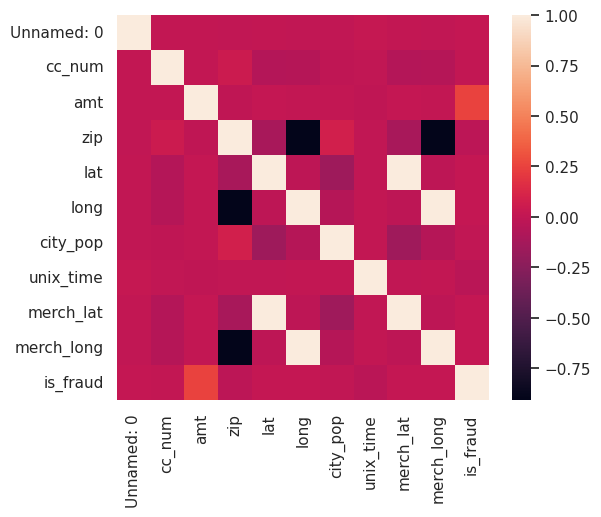

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr())

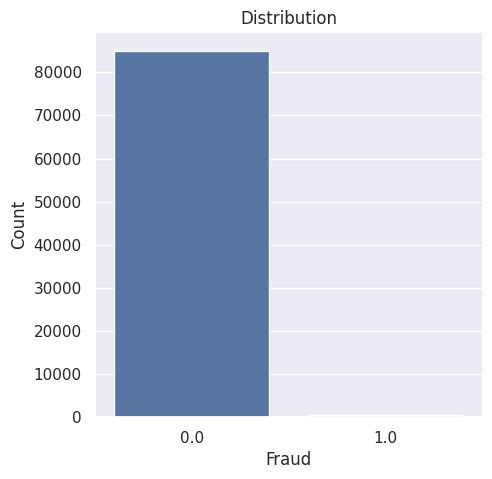

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

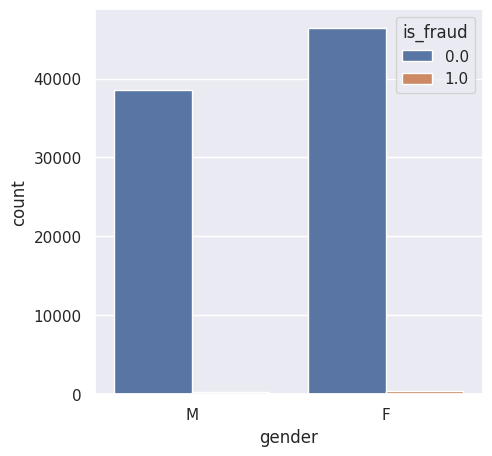

In [ ]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'gender', hue = 'is_fraud', data = df)

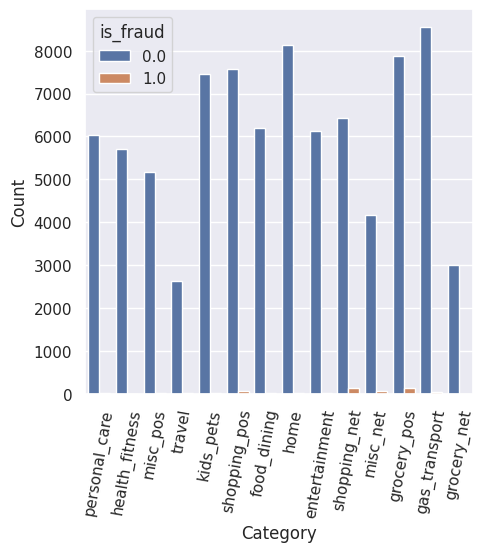

In [ ]:
plt.figure(figsize = (5, 5))
sns.countplot(x ='category', hue ='is_fraud', data = df)
plt.xticks(rotation = 80)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize = (250, 250))
sns.countplot(x = 'state', hue = 'is_fraud', data = df)
plt.xticks(rotation = 60)
plt.show()

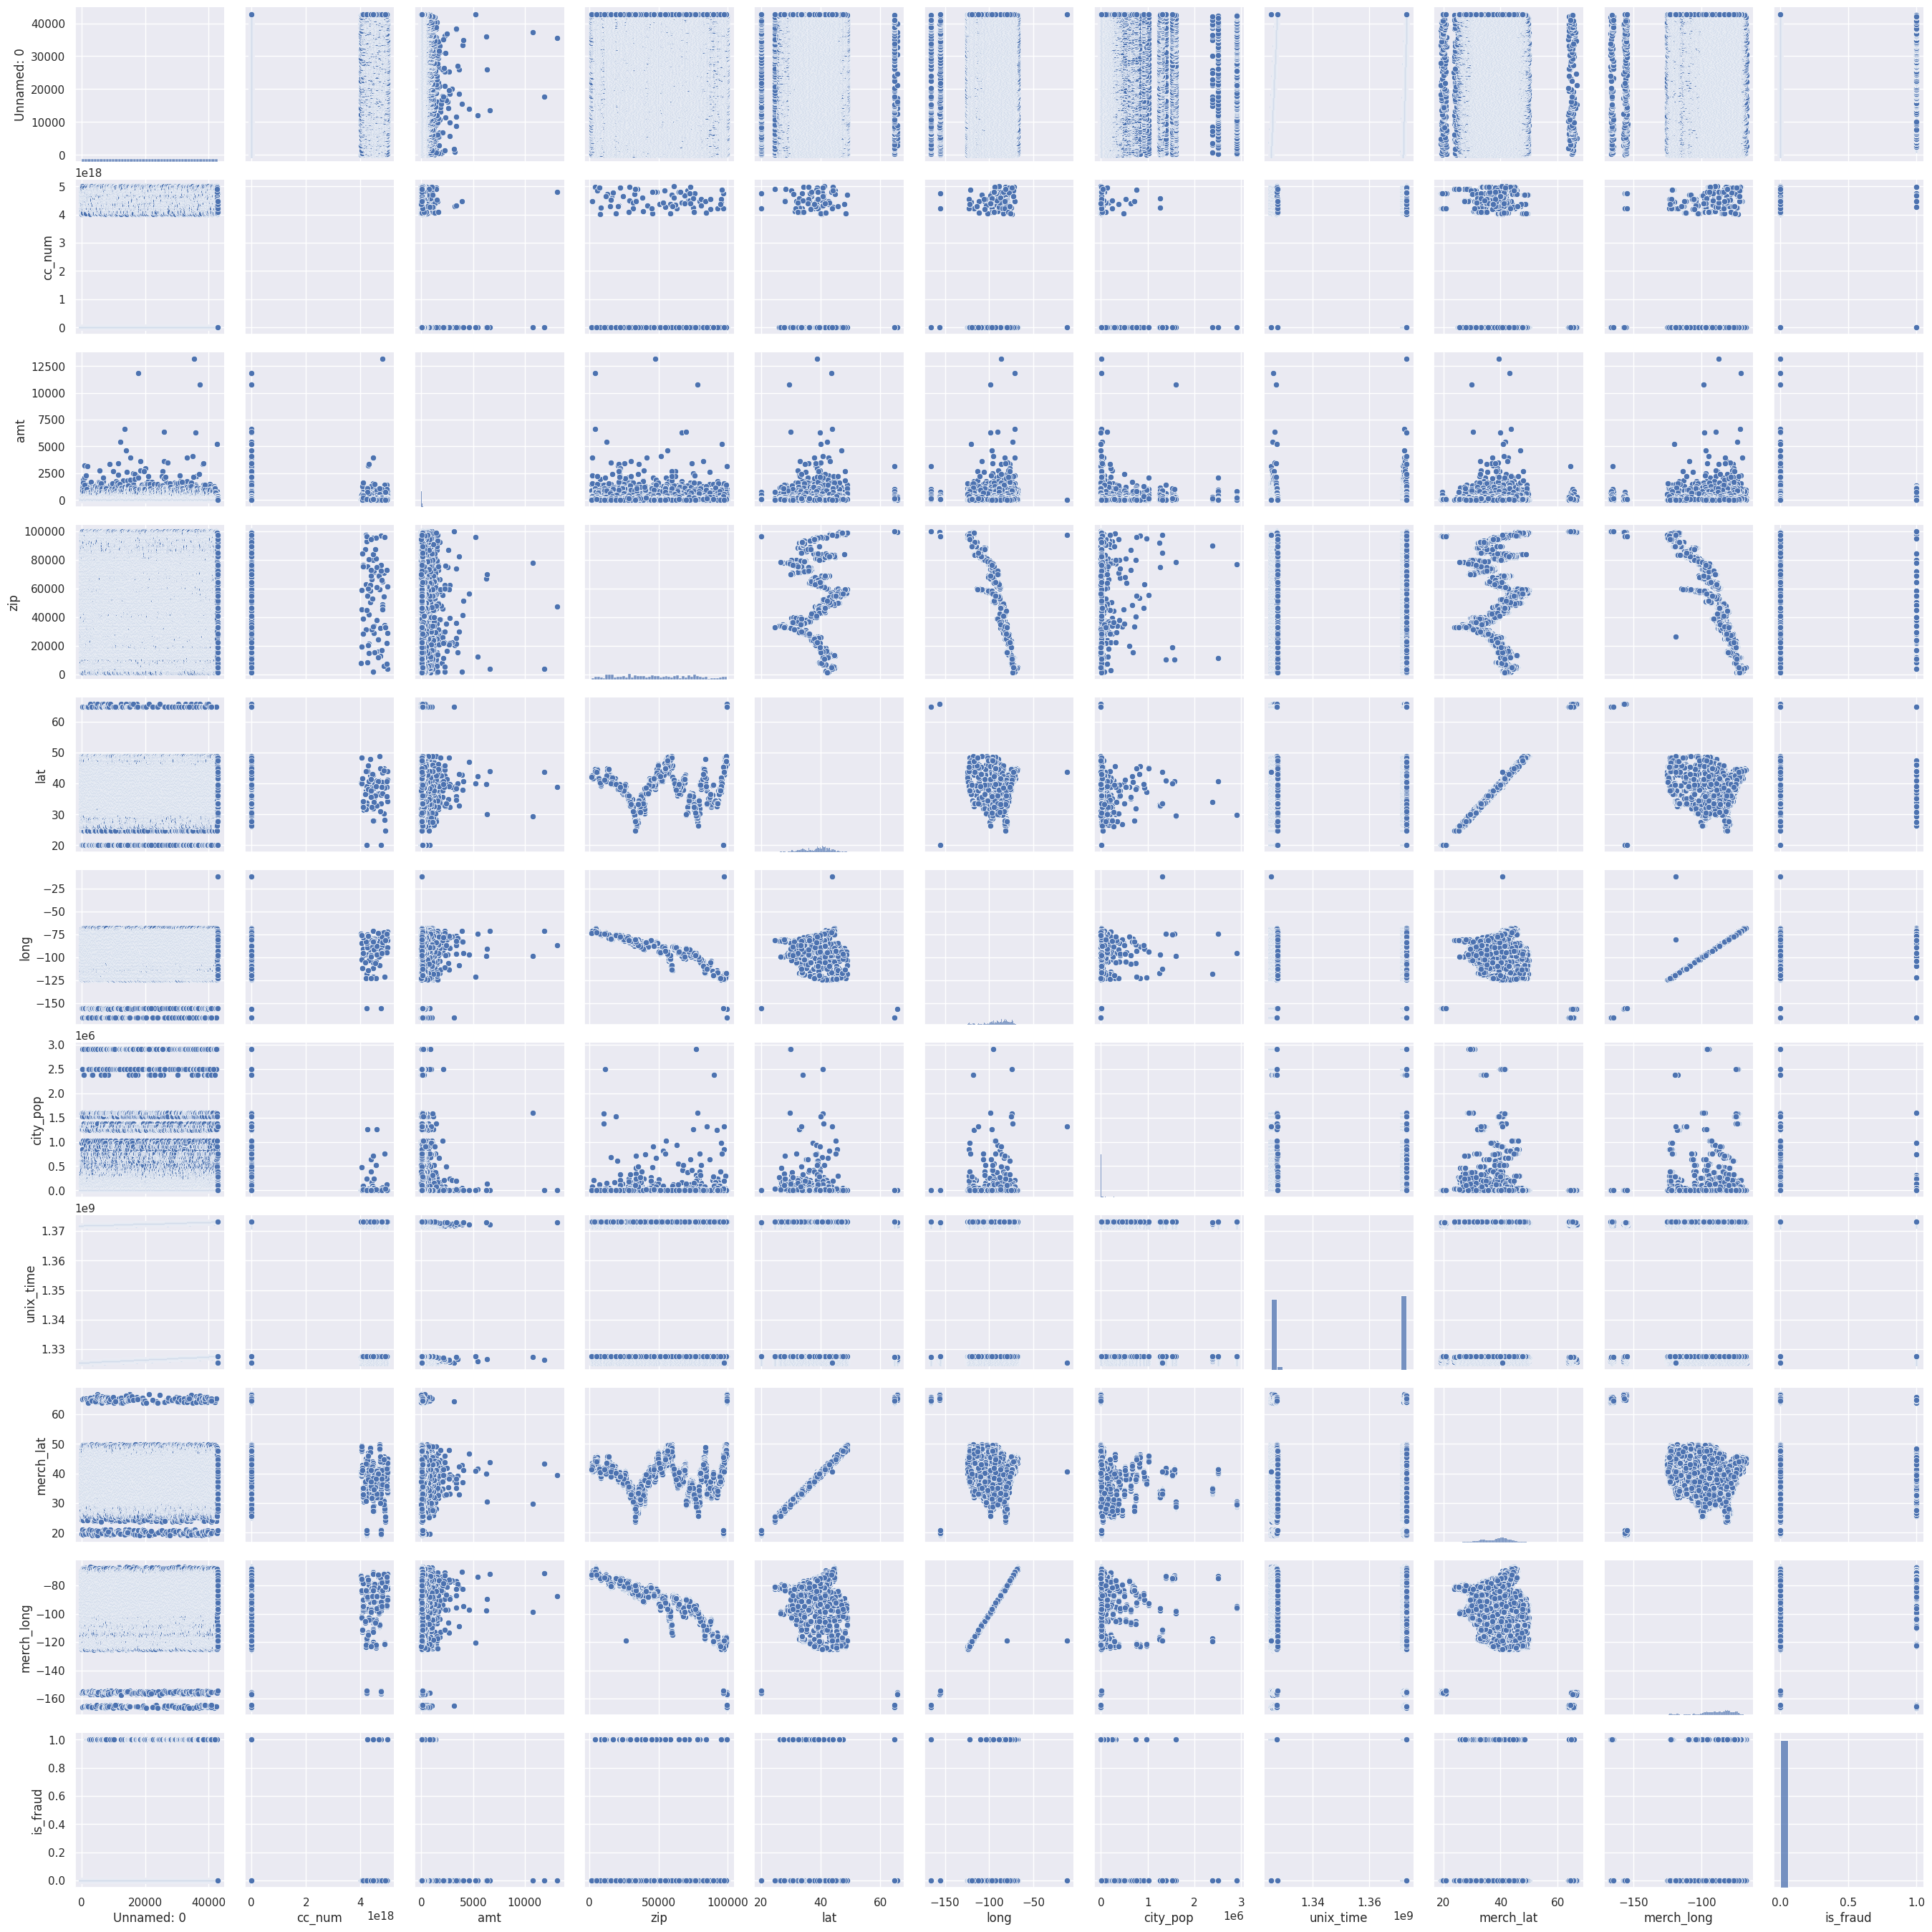

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
X = df.drop(['is_fraud'], axis = 1)
Y = df['is_fraud']

Data preprocessing is being done

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

In [ ]:
Y = df[['is_fraud']].values

In [ ]:
df['is_fraud'].value_counts()

0.0    85033
1.0      581
Name: is_fraud, dtype: int64

In [ ]:
print(' Structure of Independent Features: ' , X.shape)
print(' Structure of Dependent Features  : ',Y.shape)

 Structure of Independent Features:  (85614, 22)
 Structure of Dependent Features  :  (85614, 1)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE()

In [ ]:
x,y= smt.fit_resample(X,Y)

In [ ]:
print('Data   : ', x.shape)
print('Labels : ', y.shape)

Data   :  (170066, 22)
Labels :  (170066,)


Training and testing the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 4)

In [ ]:
LR= LogisticRegression()

In [ ]:
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred_Log= LR.predict(x_test)

In [ ]:
pred_test  = LR.predict(x_test)
print('LR Accuracy: ', accuracy_score(y_test, pred_Log))

LR Accuracy:  0.4956291650333203


From here various classification models are being used to find out the model with the highest accuracy  

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [ ]:
pred_dtc=dtc.predict(x_test)
print('DTC Accuracy: ', accuracy_score(y_test, pred_test))

DTC Accuracy:  0.4956291650333203


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 25)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred_xgb=xgb.predict(x_test)
print('XGB Accuracy: ', accuracy_score(y_test,pred_xgb))

XGB Accuracy:  0.9960995687965504


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 20, random_state = 2)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=2)

In [ ]:
pred_rfc = rfc.predict(x_test)
print('RFC Accuracy: ',accuracy_score(y_test,pred_rfc))

RFC Accuracy:  0.9997451979615837


Therefore it is clearly visible from the above fact that the RandomForestClassifier is giving the highest accuracy of 99.9%